In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kplus_gun_2GeV_Jul11_ntuple/*.root")

In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x

In [4]:
hists = {}

hists["hist_particle_pdgID"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"PDG ID", 40, 120, 330)
                            )

hists["hist_dau1_pdgID"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"PDG ID", 50, 0, 300)
                            )
hists["hist_dau2_pdgID"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"PDG ID", 50, 0, 300)
                            )
#25, -220, 3000
hists["hist_dau1_e"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Energy [MeV]", 25, 0, 500)
                            )
hists["hist_dau2_e"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Energy [MeV]", 25, 0, 500)
                            )
#25, 0, 3000
hists["hist_dau1_ke"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 25, 0, 500)
                            )
hists["hist_dau2_ke"] = hist.Hist("Sim Particle",
                                hist.Cat("Ptype", "Type of Particle"),
                                hist.Bin("e", r"Kinetic Energy [MeV]", 25, 0, 500)
                            )
#25, 0, 3000


In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_Particle']
    sim_particle_n = ldmx_events['n']['Sim_Particle']
    sim_particle_dau1 = ldmx_events['Sim_Particle_dau1']
    sim_particle_dau2 = ldmx_events['Sim_Particle_dau2']
    
    
    masks_id = {'Kplus': 321,
                'Kshort': 310,
                'Klong': 130,
                #'Kminus': -321,
                #'Electron': 11,
                #'NuE': 13,
                #'NuMuplus': 14,
                #'NuMuminus': -14,
                #'NuMuplus': 12,
                #'NuMuminus': -12,
                #'Piplus': 211,
                #'Pi0': 111,
                #'Piminus': -211,
                #'Muminus': 13,
                #'Muplus': -13,
                #'Proton':2212,
                #'Neutron':2112,
               }
    masses = {'Kplus': 493.677,
              'Kshort': 493.677,
              'Klong': 493.677,
              #'Kminus': 493.677,
              #'Electron': 0.51099895,
              #'NuE': 0,
              #'NuMuplus': 0,
              #'NuMuminus': 0,
              #'NuEplus': 0,
              #'NuEminus': 0,
              #'Piplus': 139.57039,
              #'Pi0': 134.9768,
              #'Piminus': 139.57039,
              #'Muminus': 105.658,
              #'Muplus': 105.658,
              #'Proton': 939.565,
              #'Neutron': 939.565,
              }

    decay1_mask = (flat(sim_particle_dau1.momdecay)==1)
    decay2_mask = (flat(sim_particle_dau2.momdecay)==1)
  
    dau1 = get_vector(sim_particle_dau1[decay1_mask])
    dau2 = get_vector(sim_particle_dau2[decay2_mask])
    

    
    for part,pmask in masks_id.items():
        part_mask = (sim_particle.pdgID == pmask)
        hists["hist_particle_pdgID"].fill(Ptype= part,
                                     e=flat(sim_particle.pdgID[part_mask]),
                                     )  
        part_mask1 = (sim_particle_dau1[decay1_mask].pdgID == pmask)
        hists["hist_dau1_e"].fill(Ptype= part,
                                     e=flat(sim_particle_dau1[decay1_mask].e[part_mask1]),
                                     )   
        hists["hist_dau1_ke"].fill(Ptype= part,
                                     e=flat(sim_particle_dau1[decay1_mask].e[part_mask1]) - masses[part],
                                     )   
        hists["hist_dau1_pdgID"].fill(Ptype= part,
                                     e=flat(sim_particle_dau1[decay1_mask].pdgID[part_mask1]),
                                     )  
        part_mask2 = (sim_particle_dau2[decay2_mask].pdgID == pmask)
        hists["hist_dau2_e"].fill(Ptype= part,
                                     e=flat(sim_particle_dau2[decay2_mask].e[part_mask2]),
                                     )  
        hists["hist_dau2_ke"].fill(Ptype= part,
                                     e=flat(sim_particle_dau2[decay2_mask].e[part_mask2]) - masses[part],
                                     )   
        hists["hist_dau2_pdgID"].fill(Ptype= part,
                                     e=flat(sim_particle_dau2[decay2_mask].pdgID[part_mask2]),
                                     )
    particle_count = 0    
    notkplus_count = 0 
    kplus_count = 0
    klong_count = 0
    kshort_count = 0
    for element in sim_particle.pdgID:
        for part in element:
            particle_count = particle_count +1
            if part == 321:
                kplus_count = kplus_count +1 
            if part == 130:
                klong_count = klong_count +1
            if part == 310:
                kshort_count = kshort_count +1
                       
    
    #print(flat(sim_particle_dau1[decay1_mask].pdgID))
    #print(flat(sim_particle_dau2[decay2_mask].pdgID))
    #print((sim_particle_dau1[decay1_mask].pdgID))
    #print((sim_particle_dau2[decay2_mask].pdgID))
    
    return particle_count, kplus_count, klong_count, kshort_count



In [6]:
nchunk = 0
t_particle = 0
t_kplus = 0
t_klong =  0
t_kshort = 0
for chunk in ldmx_dict:
    nchunk += 1
    print('process',nchunk)
    returna = ProcessChunk(chunk, hists) 
    t_particle = t_particle + returna[0]
    t_kplus = t_kplus + returna[1]
    t_klong = t_klong + returna[2]
    t_kshort = t_kshort + returna[3]
print('Total Kplus: ', t_kplus, "Klong Count: ", t_klong, "Kshort Count: ", t_kshort)
print('Total Particle: ', t_particle)
    

process 1
process 2
process 3
Total Kplus:  30284 Klong Count:  91 Kshort Count:  97
Total Particle:  30472


<Hist (Ptype,e) instance at 0x13523d640>


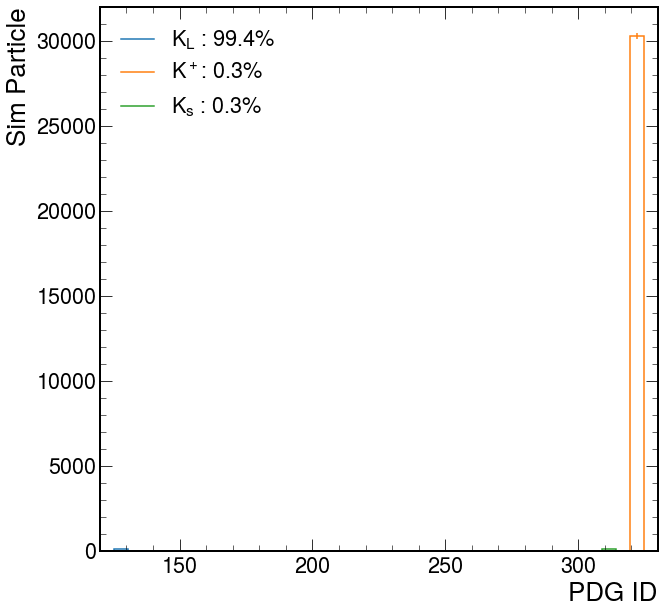

In [10]:
print(hists["hist_particle_pdgID"])
fig, ax = plt.subplots()
hist.plot1d(hists["hist_particle_pdgID"],ax=ax,clear=False);
leg = ax.legend([r'$K_L$ : 99.4%',r'$K^+$: 0.3%', r'$K_s$ : 0.3%'])

<Hist (Ptype,e) instance at 0x111a76ac0>


/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


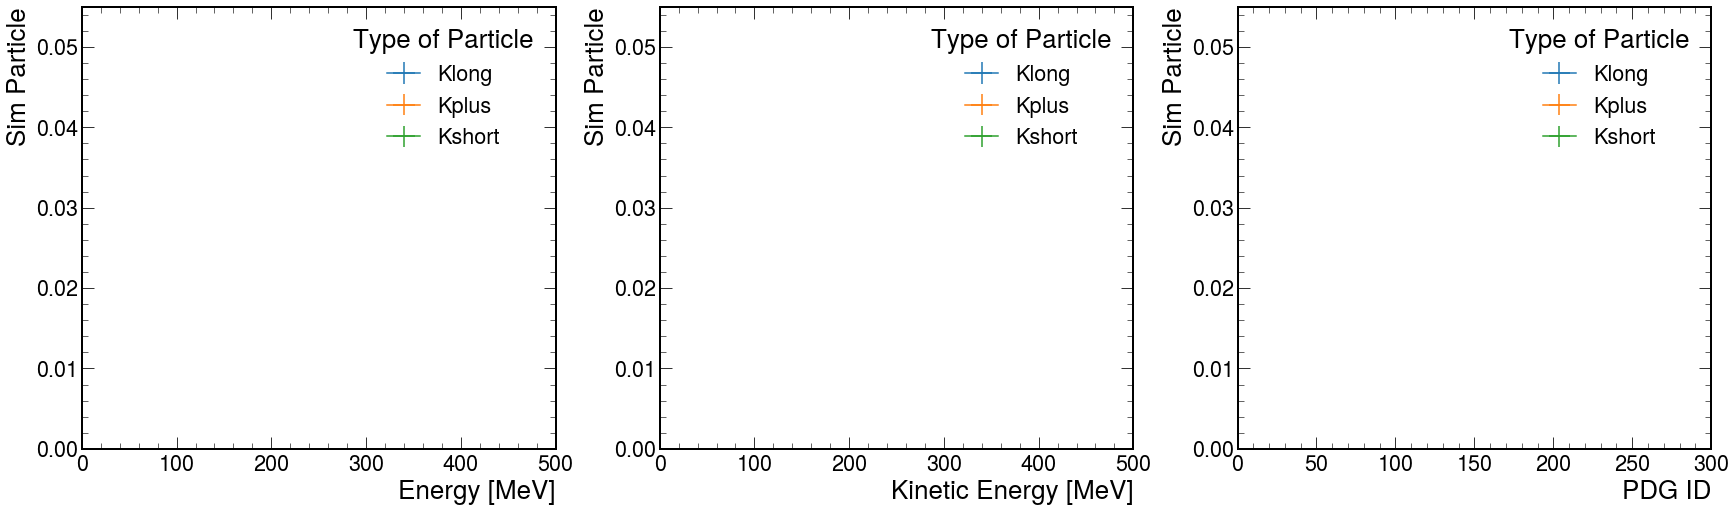

In [8]:
print(hists["hist_dau1_e"])
fig, ax = plt.subplots(1,3, figsize=(24,7), constrained_layout=True)
hist.plot1d(hists["hist_dau1_e"]+hists["hist_dau2_e"],ax=ax[0],clear=False);
#leg = ax[0].legend([r'$e^-$',r'$\nu_\mu$'])

hist.plot1d(hists["hist_dau1_ke"]+hists["hist_dau2_ke"],ax=ax[1],clear=False);
#leg = ax[1].legend([r'$e^-$',r'$\nu_\mu$'])


hist.plot1d(hists["hist_dau1_pdgID"]+hists["hist_dau2_pdgID"],ax=ax[2],clear=False);
#leg = ax[2].legend([r'$e^-$',r'$\nu_\mu$'])

#decay 1: legend([r'$e^-$',r'$K_s$', r'$\nu_\mu$',r'$\pi^-$'])
#decay 2: legend([r'$e^-$',r'$\mu^+$',r'$\pi^-$',  r'$p^+$'])
#decay 7: legend([r'$e^-$',r'$\nu_\mu$',r'$\pi^+$',  r'$p^+$'])
#decay 8: legend([r'$e^-$',r'$\nu_\mu$'])

